# Visualizing reconstructed ancestors using ARPIP

In this section, I assumed that you have the output files from [ARPIP](https://doi.org/10.1093/sysbio/syac050) (Jowkar et al. 2022) from [Github](https://github.com/acg-team/bpp-arpip).

To get started with ARPIP output, we begin by importing some useful python packages:

In [2]:
# useful imports
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()
import logomaker as lm


***
## Visualizing posterior probability profile with Logomaker


In [27]:
## Read the probability profile log file

# Define column header to have a clean header:
#column_names_protein = ["Site", "Node", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I","L", "K", "M", "F", "P", "S", "T","W", "Y", "V", "-"]
column_names_dna = ["Site", "Node", "A", "C", "G", "T", "-"]

## Parse the input file
prob_prof_df = pd.read_csv("./samples/arpip/prob_profile.txt", delimiter='\t', skiprows=10, header=None, names=column_names_dna, index_col=False, skipfooter=1, engine='python')
print("The probability profile data frame:\n")
print(prob_prof_df.head())

# Write the csv file for later use
prob_prof_df.to_csv('./samples/arpip/prob_profile.csv')           
    
# selecte a node to have the probability profile
selected_rows = prob_prof_df[prob_prof_df["Node"]=="root"]
selected_rows.reset_index(drop=True, inplace=True)


The probability profile data frame:

   Site Node         A         C         G         T  -
0     0   V2  0.485945  0.171352  0.171352  0.171352  0
1     0   V5  0.656677  0.114441  0.114441  0.114441  0
2     0   V7  0.656677  0.114441  0.114441  0.114441  0
3     0   V8  0.844342  0.051886  0.051886  0.051886  0
4     0  V12  0.663367  0.112211  0.112211  0.112211  0


Convert data frame to logo matrix with proper format

In [31]:
# Define column header to have a clean header:
# column_names_protein = ["Site", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I","L", "K", "M", "F", "P", "S", "T","W", "Y", "V"]
column_names_dna = ['Site', 'A', 'C', 'G', 'T']

# Generate a counts dataframe, which can be input to Logomaker
logo_df = selected_rows[column_names_dna]
logo_df.drop(columns=logo_df.columns[0], axis=1, inplace=True)

# rename Site to pos adapted to logomaker input 
logo_df.rename(columns={'Site':'pos'}, inplace=True)

# Print the data frame
print("The probability profile data frame:\n")
logo_df.head()

/home/hossein/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/hossein/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A,C,G,T
0,0.996458,0.001181,0.001181,0.001181
1,0.017266,0.017266,0.318948,0.646520
2,0.039542,0.943195,0.010373,0.006891
3,0.256549,0.013888,0.670278,0.059285
4,0.093026,0.078560,0.045976,0.782438


## Making logo profile

Plot the probability profile in logo format:

See [logomaker](https://github.com/jbkinney/logomaker/tree/master/logomaker/tutorials) tutorial for styling.

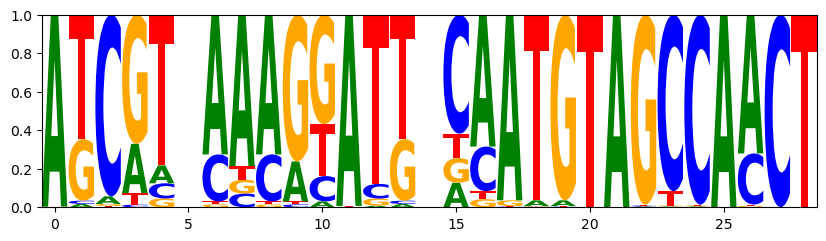

In [29]:
lm.Logo(logo_df.loc[0:30], font_name = 'Arial Rounded MT Bold')

***